In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm

In [3]:
import mctspy as mct

In [4]:
rng = np.random.default_rng()

In [5]:
M, dim = 30, 2
Dsigma = 1.

In [6]:
sigma = -1.0
s = rng.normal(loc=sigma, scale=Dsigma,size=(M,)*dim)
s += sigma - np.mean(s)
print(np.min(s))

-4.07764772470309


In [7]:
g = mct.beta_scaling_function (lam=0.74, sigma=s, M=M, dim=dim, alpha=0.1, blocks=100, store=True)
g0 = mct.beta_scaling_function (lam=0.74, sigma=sigma, M=1, blocks=100, store=True)

In [8]:
correlators = mct.CorrelatorStack([g,g0])

In [9]:
pbar = tqdm(total=g.blocks+1)
correlators.solve_all(callback=lambda d, bs2, bs, c: pbar.update(1),stop_condition=lambda c:(c.phi_[-1]<-1).all())
pbar.close()

  0%|                                                   | 0/101 [00:00<?, ?it/s]

  1%|▍                                        | 1/101 [00:37<1:02:39, 37.59s/it]

  2%|▊                                          | 2/101 [00:37<25:40, 15.56s/it]

  3%|█▎                                         | 3/101 [00:45<19:33, 11.97s/it]

  4%|█▋                                         | 4/101 [00:45<11:47,  7.29s/it]

  5%|██▏                                        | 5/101 [00:45<07:33,  4.72s/it]

  6%|██▌                                        | 6/101 [00:45<04:59,  3.16s/it]

  7%|██▉                                        | 7/101 [00:45<03:23,  2.17s/it]

  8%|███▍                                       | 8/101 [00:46<02:21,  1.52s/it]

  9%|███▊                                       | 9/101 [00:46<01:39,  1.08s/it]

 10%|████▏                                     | 10/101 [00:46<01:10,  1.28it/s]

 11%|████▌                                     | 11/101 [00:46<00:51,  1.74it/s]

 12%|████▉                                     | 12/101 [00:46<00:38,  2.30it/s]

 13%|█████▍                                    | 13/101 [00:46<00:29,  2.95it/s]

 14%|█████▊                                    | 14/101 [00:46<00:23,  3.66it/s]

 15%|██████▏                                   | 15/101 [00:46<00:19,  4.38it/s]

 16%|██████▋                                   | 16/101 [00:47<00:17,  4.94it/s]

 17%|███████                                   | 17/101 [00:47<00:15,  5.35it/s]

 18%|███████▍                                  | 18/101 [00:47<00:14,  5.84it/s]

 19%|███████▉                                  | 19/101 [00:47<00:13,  6.13it/s]

 20%|████████▎                                 | 20/101 [00:47<00:13,  6.09it/s]

 21%|████████▋                                 | 21/101 [00:47<00:12,  6.36it/s]

 22%|█████████▏                                | 22/101 [00:47<00:11,  6.60it/s]

 23%|█████████▌                                | 23/101 [00:48<00:11,  6.96it/s]

 24%|█████████▉                                | 24/101 [00:48<00:10,  7.02it/s]

 25%|██████████▍                               | 25/101 [00:48<00:10,  7.16it/s]

 26%|██████████▊                               | 26/101 [00:48<00:10,  7.09it/s]

 27%|███████████▏                              | 27/101 [00:48<00:10,  6.99it/s]

 28%|███████████▋                              | 28/101 [00:48<00:10,  6.91it/s]

 29%|████████████                              | 29/101 [00:48<00:10,  6.89it/s]

 30%|████████████▍                             | 30/101 [00:49<00:10,  6.79it/s]

 31%|████████████▉                             | 31/101 [00:49<00:10,  6.69it/s]

 32%|█████████████▎                            | 32/101 [00:49<00:10,  6.68it/s]

 33%|█████████████▋                            | 33/101 [00:49<00:10,  6.74it/s]

 33%|█████████████▋                            | 33/101 [00:49<01:42,  1.50s/it]

In [10]:
a, b = mct.util.exponents(g.lambda_)

In [11]:
valid = g.t>0
valid0 = g0.t>0

/home/tv/NOSYNC/CACHE/python-mct/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


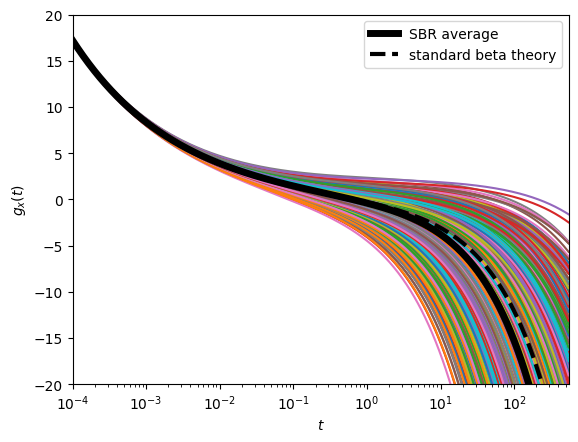

In [12]:
plt.plot(g.t[valid],g.phi[valid].reshape(g.t[valid].shape[0],-1))
plt.plot(g.t[valid],np.mean(g.phi[valid].reshape(g.t[valid].shape[0],-1), axis=-1), color='black', linewidth=5,label='SBR average')
plt.plot(g0.t[valid0],g0.phi[valid0,0], color='black', linewidth=3, linestyle='dashed',label='standard beta theory')
plt.xscale('log')
plt.xlim(1e-4,g.t[valid][-1])
plt.ylim(-20,20)
plt.xlabel(r'$t$')
plt.ylabel(r'$g_x(t)$')
plt.legend()
plt.show()

In [13]:
Blam = np.mean(g.phi[valid][-50:,:,:]*np.power(g.t[valid][-50:],-b)[:,None,None],axis=0)

In [14]:
np.mean(Blam),np.std(Blam),np.std(Blam)/np.mean(Blam)

(np.float64(-1.0960584857012863),
 np.float64(0.6911721289746835),
 np.float64(-0.6305978540300738))

In [15]:
mct.util.Blambda(g.lambda_)

np.float64(-0.86031779)

In [16]:
g = mct.beta_scaling_function (lam=0.74, sigma=-s, M=M, dim=dim, alpha=0.1, blocks=100, store=True)
g0 = mct.beta_scaling_function (lam=0.74, sigma=-sigma, M=1, blocks=100, store=True)

In [17]:
correlators = mct.CorrelatorStack([g,g0])

In [18]:
pbar = tqdm(total=g.blocks+1)
correlators.solve_all(callback=lambda d, bs2, bs, c: pbar.update(1),stop_condition=lambda c:False and c==g0 or (c.phi_[-1]<-1).all())
pbar.close()

  0%|                                                   | 0/101 [00:00<?, ?it/s]

  2%|▊                                          | 2/101 [00:00<00:08, 11.67it/s]

  4%|█▋                                         | 4/101 [00:00<00:10,  9.04it/s]

  5%|██▏                                        | 5/101 [00:00<00:11,  8.72it/s]

  6%|██▌                                        | 6/101 [00:00<00:11,  8.43it/s]

  7%|██▉                                        | 7/101 [00:00<00:11,  8.15it/s]

  8%|███▍                                       | 8/101 [00:00<00:11,  7.89it/s]

  9%|███▊                                       | 9/101 [00:01<00:12,  7.62it/s]

 10%|████▏                                     | 10/101 [00:01<00:12,  7.42it/s]

 11%|████▌                                     | 11/101 [00:01<00:12,  7.30it/s]

 12%|████▉                                     | 12/101 [00:01<00:12,  7.21it/s]

 13%|█████▍                                    | 13/101 [00:01<00:12,  7.26it/s]

 14%|█████▊                                    | 14/101 [00:01<00:11,  7.36it/s]

 15%|██████▏                                   | 15/101 [00:01<00:12,  7.09it/s]

 16%|██████▋                                   | 16/101 [00:02<00:12,  6.94it/s]

 17%|███████                                   | 17/101 [00:02<00:11,  7.08it/s]

 18%|███████▍                                  | 18/101 [00:02<00:11,  7.25it/s]

 19%|███████▉                                  | 19/101 [00:02<00:11,  6.96it/s]

 20%|████████▎                                 | 20/101 [00:02<00:11,  6.93it/s]

 21%|████████▋                                 | 21/101 [00:02<00:11,  6.87it/s]

 22%|█████████▏                                | 22/101 [00:02<00:11,  6.76it/s]

 23%|█████████▌                                | 23/101 [00:03<00:11,  6.56it/s]

 24%|█████████▉                                | 24/101 [00:03<00:11,  6.48it/s]

 25%|██████████▍                               | 25/101 [00:03<00:12,  6.33it/s]

 26%|██████████▊                               | 26/101 [00:03<00:12,  6.22it/s]

 27%|███████████▏                              | 27/101 [00:03<00:11,  6.20it/s]

 28%|███████████▋                              | 28/101 [00:03<00:12,  6.06it/s]

 29%|████████████                              | 29/101 [00:04<00:12,  5.97it/s]

 30%|████████████▍                             | 30/101 [00:04<00:12,  5.79it/s]

 31%|████████████▉                             | 31/101 [00:04<00:12,  5.73it/s]

 32%|█████████████▎                            | 32/101 [00:04<00:12,  5.61it/s]

 33%|█████████████▋                            | 33/101 [00:04<00:12,  5.47it/s]

 34%|██████████████▏                           | 34/101 [00:05<00:12,  5.33it/s]

 35%|██████████████▌                           | 35/101 [00:05<00:12,  5.20it/s]

 36%|██████████████▉                           | 36/101 [00:05<00:12,  5.04it/s]

 37%|███████████████▍                          | 37/101 [00:05<00:13,  4.91it/s]

 38%|███████████████▊                          | 38/101 [00:05<00:13,  4.82it/s]

 39%|████████████████▏                         | 39/101 [00:06<00:13,  4.75it/s]

 40%|████████████████▋                         | 40/101 [00:06<00:13,  4.64it/s]

 41%|█████████████████                         | 41/101 [00:06<00:13,  4.55it/s]

 42%|█████████████████▍                        | 42/101 [00:06<00:13,  4.48it/s]

 43%|█████████████████▉                        | 43/101 [00:07<00:12,  4.47it/s]

 44%|██████████████████▎                       | 44/101 [00:07<00:12,  4.45it/s]

 45%|██████████████████▋                       | 45/101 [00:07<00:12,  4.43it/s]

 46%|███████████████████▏                      | 46/101 [00:07<00:12,  4.43it/s]

 47%|███████████████████▌                      | 47/101 [00:07<00:12,  4.39it/s]

 48%|███████████████████▉                      | 48/101 [00:08<00:12,  4.36it/s]

 49%|████████████████████▍                     | 49/101 [00:08<00:11,  4.39it/s]

 50%|████████████████████▊                     | 50/101 [00:08<00:11,  4.38it/s]

 50%|█████████████████████▏                    | 51/101 [00:08<00:11,  4.37it/s]

 51%|█████████████████████▌                    | 52/101 [00:09<00:11,  4.32it/s]

 52%|██████████████████████                    | 53/101 [00:09<00:11,  4.33it/s]

 53%|██████████████████████▍                   | 54/101 [00:09<00:10,  4.36it/s]

 54%|██████████████████████▊                   | 55/101 [00:09<00:10,  4.41it/s]

 55%|███████████████████████▎                  | 56/101 [00:10<00:10,  4.46it/s]

 56%|███████████████████████▋                  | 57/101 [00:10<00:09,  4.52it/s]

 57%|████████████████████████                  | 58/101 [00:10<00:09,  4.59it/s]

 58%|████████████████████████▌                 | 59/101 [00:10<00:08,  4.68it/s]

 59%|████████████████████████▉                 | 60/101 [00:10<00:08,  4.76it/s]

 60%|█████████████████████████▎                | 61/101 [00:11<00:08,  4.86it/s]

 61%|█████████████████████████▊                | 62/101 [00:11<00:08,  4.82it/s]

 62%|██████████████████████████▏               | 63/101 [00:11<00:07,  4.82it/s]

 63%|██████████████████████████▌               | 64/101 [00:11<00:07,  4.91it/s]

 64%|███████████████████████████               | 65/101 [00:11<00:07,  4.92it/s]

 65%|███████████████████████████▍              | 66/101 [00:12<00:06,  5.06it/s]

 66%|███████████████████████████▊              | 67/101 [00:12<00:06,  5.13it/s]

 67%|████████████████████████████▎             | 68/101 [00:12<00:06,  5.31it/s]

 68%|████████████████████████████▋             | 69/101 [00:12<00:05,  5.53it/s]

 69%|█████████████████████████████             | 70/101 [00:12<00:05,  5.73it/s]

 70%|█████████████████████████████▌            | 71/101 [00:12<00:05,  5.89it/s]

 71%|█████████████████████████████▉            | 72/101 [00:13<00:04,  6.05it/s]

 72%|██████████████████████████████▎           | 73/101 [00:13<00:04,  6.09it/s]

 73%|██████████████████████████████▊           | 74/101 [00:13<00:04,  6.26it/s]

 74%|███████████████████████████████▏          | 75/101 [00:13<00:04,  6.33it/s]

 75%|███████████████████████████████▌          | 76/101 [00:13<00:03,  6.55it/s]

 76%|████████████████████████████████          | 77/101 [00:13<00:03,  6.74it/s]

 77%|████████████████████████████████▍         | 78/101 [00:13<00:03,  6.88it/s]

 78%|████████████████████████████████▊         | 79/101 [00:14<00:03,  6.99it/s]

 79%|█████████████████████████████████▎        | 80/101 [00:14<00:02,  7.08it/s]

 80%|█████████████████████████████████▋        | 81/101 [00:14<00:02,  7.13it/s]

 81%|██████████████████████████████████        | 82/101 [00:14<00:02,  7.28it/s]

 82%|██████████████████████████████████▌       | 83/101 [00:14<00:02,  7.40it/s]

 83%|██████████████████████████████████▉       | 84/101 [00:14<00:02,  7.47it/s]

 84%|███████████████████████████████████▎      | 85/101 [00:14<00:02,  7.50it/s]

 85%|███████████████████████████████████▊      | 86/101 [00:14<00:01,  7.56it/s]

 86%|████████████████████████████████████▏     | 87/101 [00:15<00:01,  7.54it/s]

 87%|████████████████████████████████████▌     | 88/101 [00:15<00:01,  7.60it/s]

 88%|█████████████████████████████████████     | 89/101 [00:15<00:01,  7.68it/s]

 89%|█████████████████████████████████████▍    | 90/101 [00:15<00:01,  7.32it/s]

 90%|█████████████████████████████████████▊    | 91/101 [00:15<00:01,  7.18it/s]

 91%|██████████████████████████████████████▎   | 92/101 [00:15<00:01,  7.15it/s]

 92%|██████████████████████████████████████▋   | 93/101 [00:15<00:01,  7.15it/s]

 93%|███████████████████████████████████████   | 94/101 [00:16<00:01,  6.95it/s]

 94%|███████████████████████████████████████▌  | 95/101 [00:16<00:00,  6.80it/s]

 95%|███████████████████████████████████████▉  | 96/101 [00:16<00:00,  6.92it/s]

 96%|████████████████████████████████████████▎ | 97/101 [00:16<00:00,  7.19it/s]

 97%|████████████████████████████████████████▊ | 98/101 [00:16<00:00,  7.39it/s]

 98%|█████████████████████████████████████████▏| 99/101 [00:16<00:00,  7.53it/s]

 99%|████████████████████████████████████████▌| 100/101 [00:16<00:00,  7.75it/s]

100%|█████████████████████████████████████████| 101/101 [00:17<00:00,  7.96it/s]

100%|█████████████████████████████████████████| 101/101 [00:17<00:00,  5.94it/s]

In [19]:
valid = g.t>0
valid0 = g0.t>0

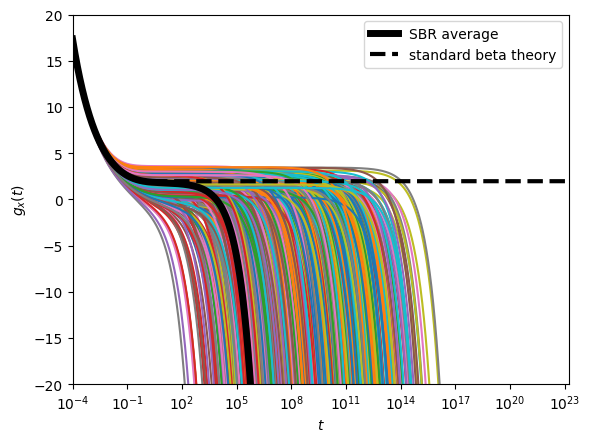

In [20]:
plt.plot(g.t[valid],g.phi[valid].reshape(g.t[valid].shape[0],-1))
plt.plot(g.t[valid],np.mean(g.phi[valid].reshape(g.t[valid].shape[0],-1), axis=-1), color='black', linewidth=5,label='SBR average')
plt.plot(g0.t[valid0],g0.phi[valid0,0], color='black', linewidth=3, linestyle='dashed',label='standard beta theory')
plt.xscale('log')
plt.xlim(1e-4,g.t[valid][-1])
plt.ylim(-20,20)
plt.xlabel(r'$t$')
plt.ylabel(r'$g_x(t)$')
plt.legend()
plt.show()

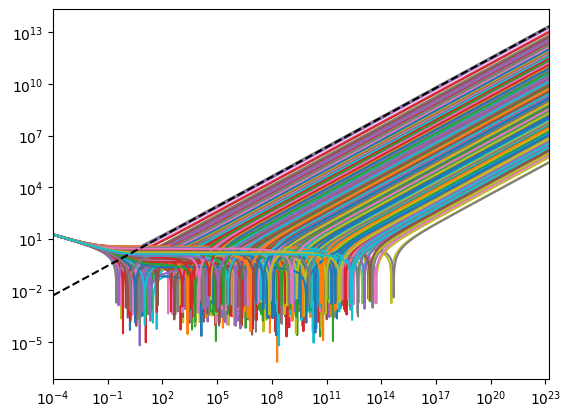

In [21]:
plt.plot(g.t[valid],np.abs(g.phi[valid].reshape(g.t[valid].shape[0],-1)))
plt.plot(g.t[valid],np.power(g.t[valid],b),linestyle='dashed',color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-4,g.t[valid][-1])
plt.show()

In [22]:
Blamglass = np.mean(g.phi[valid][-50:,:,:]*np.power(g.t[valid][-50:],-b)[:,None,None],axis=0)

In [23]:
np.mean(Blamglass),np.std(Blamglass),np.std(Blamglass)/np.mean(Blamglass)

(np.float64(-0.010640871169658202),
 np.float64(0.06264344997036897),
 np.float64(-5.887060276511284))

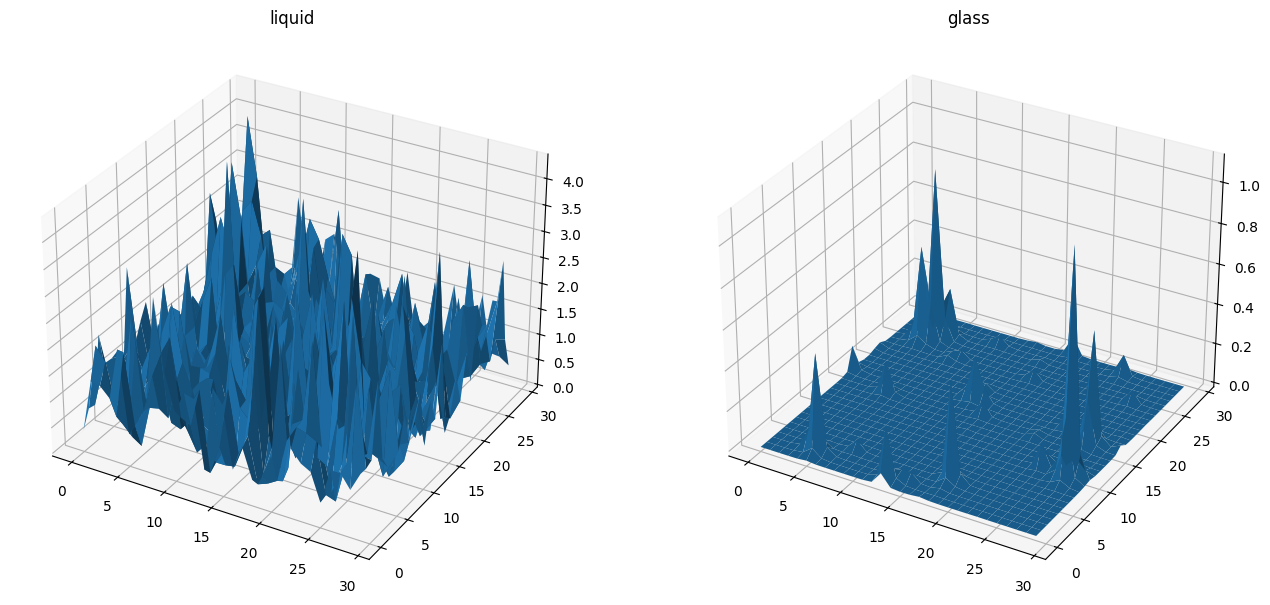

In [24]:
x_, y_  = np.meshgrid(np.arange(M),np.arange(M))
fig, ax = plt.subplots(ncols=2,figsize=(16,12),subplot_kw=dict(projection='3d'))
ax[0].set_title('liquid')
ax[0].plot_surface(x_, y_, -Blam)
ax[1].set_title('glass')
ax[1].plot_surface(x_, y_, -Blamglass)
plt.show()

In [25]:
tau_g = g.phi.shape[0] - np.sum(g.phi<-1,axis=0)

In [26]:
np.std(tau_g)/np.mean(tau_g)

np.float64(0.18445523974528563)

In [27]:
import scipy.signal

In [28]:
sigmarange = np.linspace(-1,1,21)
l = 0.74
a, b = mct.util.exponents(l)
Bvalues = []
for sigma in tqdm(sigmarange):
    s = rng.normal(loc=sigma, scale=Dsigma, size=(M,)*dim)
    s += sigma - np.mean(s)
    g = mct.beta_scaling_function (lam=0.74, sigma=s, M=M, dim=dim, alpha=0.1, blocks=100, store=True)
    g.solve_all()
    Bvalues.append(np.mean(g.phi[-50:,:,:]*np.power(g.t[-50:],-b)[:,None,None],axis=0))

  0%|                                                    | 0/21 [00:00<?, ?it/s]

  5%|██                                          | 1/21 [00:13<04:21, 13.09s/it]

 10%|████▏                                       | 2/21 [00:26<04:09, 13.12s/it]

 14%|██████▎                                     | 3/21 [00:39<04:00, 13.38s/it]

 19%|████████▍                                   | 4/21 [00:53<03:48, 13.41s/it]

 24%|██████████▍                                 | 5/21 [01:06<03:34, 13.41s/it]

 29%|████████████▌                               | 6/21 [01:19<03:17, 13.16s/it]

 33%|██████████████▋                             | 7/21 [01:32<03:02, 13.06s/it]

 38%|████████████████▊                           | 8/21 [01:46<02:53, 13.32s/it]

 43%|██████████████████▊                         | 9/21 [01:59<02:40, 13.36s/it]

 48%|████████████████████▍                      | 10/21 [02:13<02:30, 13.65s/it]

 52%|██████████████████████▌                    | 11/21 [02:28<02:19, 13.93s/it]

 57%|████████████████████████▌                  | 12/21 [02:42<02:06, 14.02s/it]

 62%|██████████████████████████▌                | 13/21 [02:56<01:52, 14.03s/it]

 67%|████████████████████████████▋              | 14/21 [03:11<01:39, 14.19s/it]

 71%|██████████████████████████████▋            | 15/21 [03:26<01:26, 14.44s/it]

 76%|████████████████████████████████▊          | 16/21 [03:41<01:13, 14.66s/it]

 81%|██████████████████████████████████▊        | 17/21 [03:54<00:56, 14.21s/it]

 86%|████████████████████████████████████▊      | 18/21 [04:08<00:42, 14.13s/it]

 90%|██████████████████████████████████████▉    | 19/21 [04:22<00:28, 14.02s/it]

 95%|████████████████████████████████████████▉  | 20/21 [04:37<00:14, 14.25s/it]

100%|███████████████████████████████████████████| 21/21 [04:51<00:00, 14.33s/it]

100%|███████████████████████████████████████████| 21/21 [04:51<00:00, 13.89s/it]

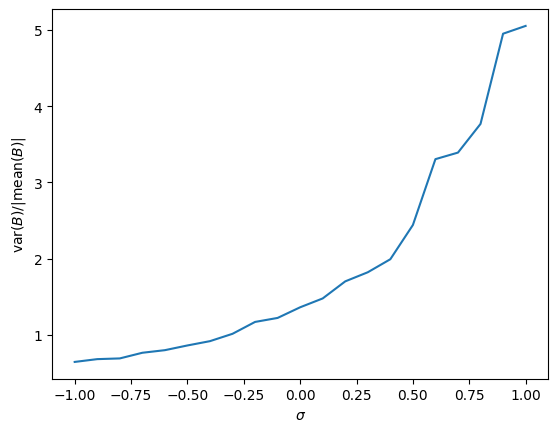

In [29]:
Bvar = [np.std(Bx)/np.abs(np.mean(Bx)) for Bx in Bvalues]
plt.plot(sigmarange,Bvar)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\text{var}(B)/|\text{mean}(B)|$')
plt.show()

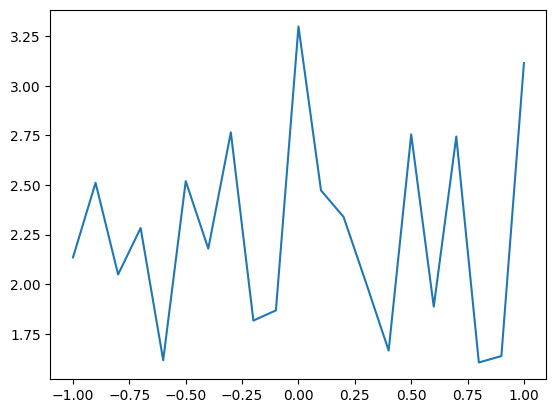

In [30]:
def expfit(x, xi, A):
    return A*np.exp(-x*xi)
var=[]
for Bx in Bvalues:
    shape = Bx.shape
    dists=np.sqrt(np.fft.fftfreq(shape[0])[:,None]**2 + np.fft.fftfreq(shape[1])[None,:]**2)
    bins = np.arange(max(shape)/2+1)/float(max(shape))
    hd=np.histogram(dists,bins)[0]
    Bw = np.abs(np.fft.fft2(Bx))
    lin=np.histogram(dists,bins,weights=Bw)[0]/hd
    x=bins[:-1]+np.diff(bins)
    #plt.plot(x[1:],lin[1:]/np.max(lin))
    popt,_ = scipy.optimize.curve_fit(expfit,x[1:],lin[1:]/np.max(lin))
    #plt.plot(x[1:],expfit(x[1:],*popt),linestyle='dashed')
    var.append(popt[0])
plt.plot(sigmarange,np.array(var))
#x=np.arange(lin.shape[0])[1:]
#plt.plot(x,np.exp(-x*2))
#plt.plot(np.max(Blamw)*np.exp(-np.arange(hd.shape[0])))
plt.show()